# Mercedes-Benz Greener Manufacturing
### DESCRIPTION
Reduce the time a Mercedes-Benz spends on the test bench.

### Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

### Following actions should be performed:

    1. If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
    2. Check for null and unique values for test and train sets.
    3. Apply label encoder.
    4. Perform dimensionality reduction.
    5. Predict your test_df values using XGBoost.


In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as split, GridSearchCV
import xgboost
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor # For dimensionality reduction
from sklearn.metrics import mean_squared_error as mse, r2_score

In [25]:
# Importing the train data set

merc_train = pd.read_csv (r'H:\Documents\Study material\Data Science course\Machine Learning\Main projects\Project - Mercedes-Benz Greener Manufacturing\train.csv')
print ('************************************************ Train data ************************************************')
display (merc_train.head ())
print ('The shape of the train data set =', merc_train.shape)

# Importing the test data set

merc_test = pd.read_csv (r'H:\Documents\Study material\Data Science course\Machine Learning\Main projects\Project - Mercedes-Benz Greener Manufacturing\test.csv')
print ('\n\n************************************************ Test data ************************************************')
display (merc_test.head ())
print ('The shape of the test data set =', merc_test.shape)

************************************************ Train data ************************************************


,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


The shape of the train data set = (4209, 378)


************************************************ Test data ************************************************


,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


The shape of the test data set = (4209, 377)


In [26]:
# Checking the basic information of the train and test data

print ('train data info = ')
print (merc_train.info ())
print ('\ntrain data info = ')
print (merc_test.info ());

train data info = 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB
None

train data info = 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB
None


##### Inferences :
    1. We can see that both train and test data same number of records.
    2. Total columns in the train data = 378 including the target column 'y' which is not in the test data.
    3. There are 369 numerical type of predictors and 8 object type.
    4. The head of the train and test data shows binary values in most of the columns. 
       We may be interested in checking the binary and multiclass predictors.

In [4]:
# Checkin
g for any missing values in the train and the test data

print ('Are there any missing values in the train data?   ', merc_train.isna ().any ().any ())
print ('Are there any missing values in the test data?   ', merc_train.isna ().any ().any ())

Are there any missing values in the train data?    False
Are there any missing values in the test data?    False


##### There are no missing values in the train and the test data.

In [27]:
# Checking for number of binary and multiclass predictors

check_tr = merc_train.nunique ()
check_te = merc_test.nunique ()
print ('************************************************ Train data ************************************************')
print ('Number of predictors with 0 variance = ', (check_tr == 1).sum ())
print ('Number of binary predictors are ', (check_tr == 2).sum ())
print ('Number of multiclass predictors are ', (check_tr > 2).sum ())

print ('\n\n************************************************ Test data ************************************************')
print ('Number of predictors with 0 variance = ', (check_te == 1).sum ())
print ('Number of binary predictors are ', (check_te == 2).sum ())
print ('Number of multiclass predictors are ', (check_te > 2).sum ())

************************************************ Train data ************************************************
Number of predictors with 0 variance =  12
Number of binary predictors are  356
Number of multiclass predictors are  10


************************************************ Test data ************************************************
Number of predictors with 0 variance =  5
Number of binary predictors are  363
Number of multiclass predictors are  9


##### Inferences :
    1. In train data, we can see that there are 12 columns with 0 variance. Hence, we can remove these columns.
    2. In train and test data, there are 356 and 363 binary columns respectively.
    3. In train data, number of multi class predictors are 9 (including target columns which is actually float).
    4. Looking at the train and the test data we can see that these are all object type of columns.

In [28]:
# checking the columns with 0 variance

merc_train.loc [: , check_tr == 1].apply (lambda x : x.sample (n = 20).reset_index (drop = True), axis = 0)

,X11,X93,X107,X233,X235,X268,X289,X290,X293,X297,X330,X347
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
# Dropping the columns with 0 variance

merc_train.drop (columns = list (check_tr [check_tr == 1].index), inplace = True)
merc_test.drop (columns = list (check_tr [check_tr == 1].index), inplace = True)

In [30]:
# Dropping the ID column as it has no significance in predictions

merc_train.drop (columns = 'ID', inplace = True)
merc_test.drop (columns = 'ID', inplace = True)

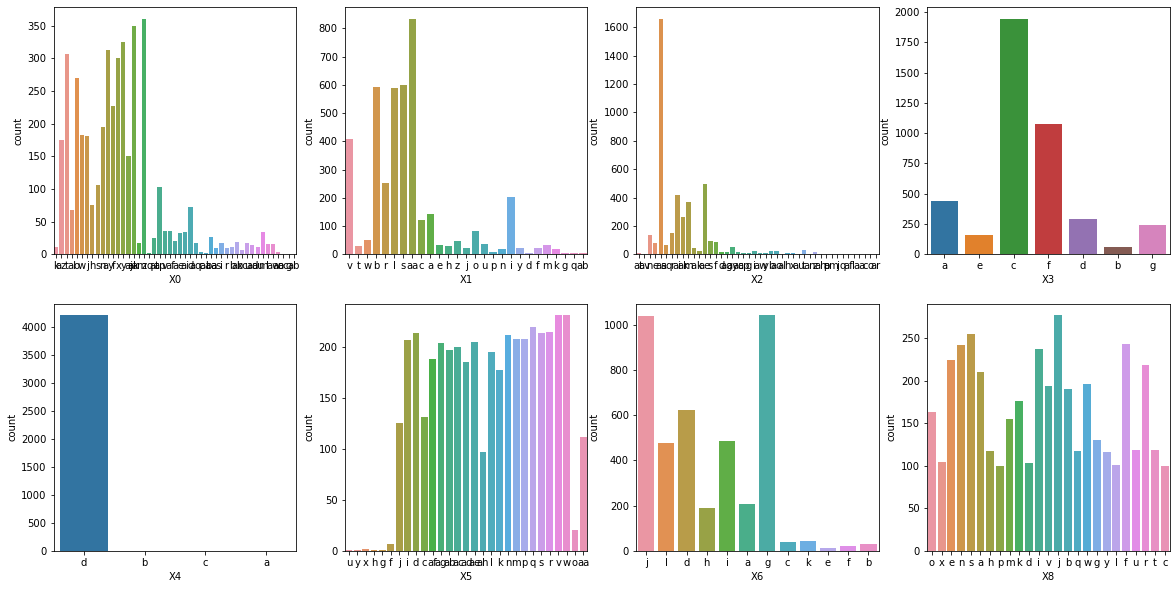

In [31]:
# Checking the distribution of the object type of columns

plt.figure (figsize = (20,10))

for i in range (1,9) :
    plt.subplot (2,4,i)
    sns.countplot (merc_train.iloc [:,i])

##### We can remove the X4 column as it is highly biased towards one class only.

In [32]:
# Dropping the X4 column

merc_train.drop (columns = 'X4', inplace = True)
merc_test.drop (columns = 'X4', inplace = True)

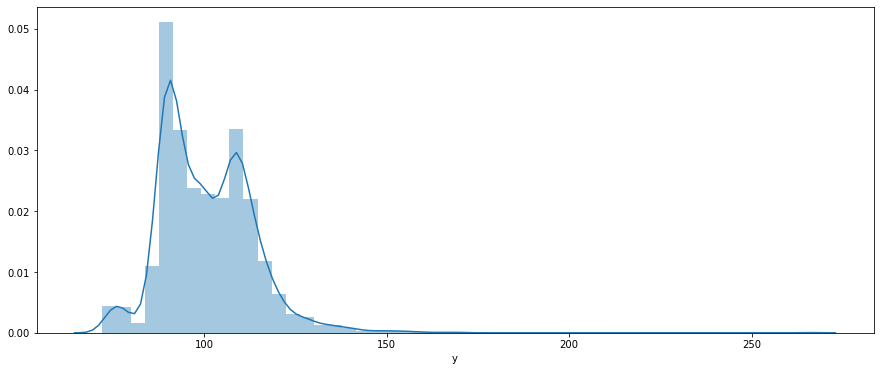

In [33]:
# Checking the distribution of target variable

plt.figure (figsize = (15, 6))
sns.distplot (merc_train.y);

##### Looks like presence of some outliers. Let's check the scatterplot with sorted values.

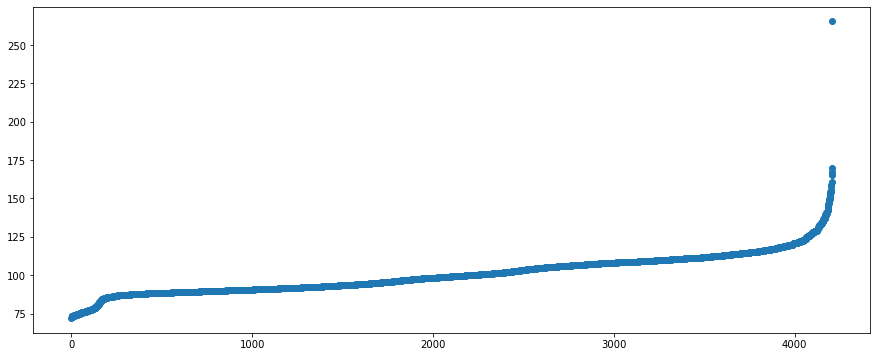

In [35]:
plt.figure (figsize = (15, 6))
plt.scatter (range (merc_train.shape [0]), merc_train.y.sort_values ());

##### We can see that there is 1 outlier which we can remove.

In [36]:
# Removing the outlier

merc_train = merc_train [merc_train.y < 200]

In [37]:
merc_train [['y']].describe ().T

,count,mean,std,min,25%,50%,75%,max
y,4208.0,100.63019,12.424146,72.11,90.8175,99.15,109.01,169.91


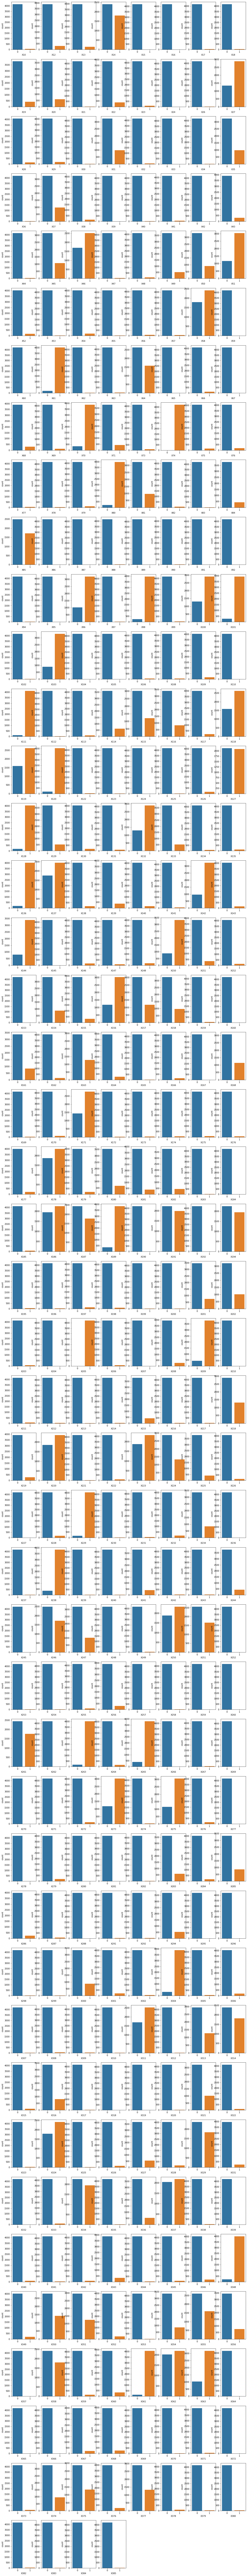

In [38]:
# Checking the distribution of binary columns

from math import ceil
binary_cols = merc_train.select_dtypes ('int64').columns
n_plots = len (binary_cols)  # no. of plots to constructs
n_cols = 8   # no. of columns of the plots
n_rows = ceil (n_plots / n_cols)   # no. of rows of the plots

plt.figure (figsize = (20,5 * n_rows))

for i, col in enumerate (binary_cols) :
    plt.subplot (n_rows, n_cols, i+1)
    sns.countplot (merc_train [col])

##### Looks like some of the columns are extremely skewed towards 1 class. We can first convert object columns through one hot encoding.

In [39]:
# Adding the test data with the train data

merc_test ['y'] = -1
merc = pd.concat ([merc_train, merc_test], axis = 0)

# converting object columns through one hot encoding

merc = pd.get_dummies (merc, drop_first = True)

print ('The shape of the resultant data set =', merc.shape)

merc_train = merc [merc.y != -1]
merc_test = merc [merc.y == -1]

The shape of the resultant data set = (8417, 557)


In [41]:
# Finding the % of values in the majority class of each binary variable

n_obs = merc_train.shape [0]   # Finding the number of observations

max_category = [merc_train [col].value_counts ().max () / n_obs for col in merc_train.columns]

check = pd.DataFrame ({'features' : merc_train.columns, 
                       'max_category' : max_category}).sort_values ('max_category', 
                                                                    ascending = False).reset_index (drop = True)

check.index = range (1, check.shape [0]+1)
check.iloc [: 50,:]

,features,max_category
1,X2_u,1.000000
2,X0_ag,1.000000
3,X0_bb,1.000000
4,X2_ax,1.000000
5,X0_av,1.000000
6,X0_an,1.000000
7,X0_p,1.000000
8,X5_b,1.000000
9,X2_ad,1.000000
10,X2_ab,1.000000


##### We can see that many columns having very low variance. Let's check the columns having variance < 0.01.

In [53]:
check = merc_train.loc [ : , merc_train.var () < 0.01]
check.columns

Index(['X15', 'X16', 'X17', 'X18', 'X21', 'X24', 'X26', 'X30', 'X33', 'X34',
       ...
       'X5_o', 'X5_t', 'X5_u', 'X5_x', 'X5_y', 'X5_z', 'X6_b', 'X6_c', 'X6_e',
       'X6_f'],
      dtype='object', length=235)

##### there are total 235 columns with variance < 0.01. Let's check the value counts of one of these columns having max variance.

In [58]:
check [check.var ().sort_values (ascending = False).index [0]].value_counts ()

0    4166
1      42
Name: X274, dtype: int64

##### As we can see that more than 99% values are of majority class. We can remove these columns from the data set.

In [59]:
merc_train.drop (columns = check.columns, inplace = True)
merc_test.drop (columns = check.columns, inplace = True)

print ('The shape of the train data =', merc_train.shape)
print ('The shape of the test data =', merc_test.shape)

The shape of the train data = (4208, 322)
The shape of the test data = (4209, 322)


c:\python\python38\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [60]:
# Getting the X and y variables

X = merc_train.drop (columns = 'y')
y = merc_train.y

In [61]:
rf = RandomForestRegressor (max_depth = 2, max_features = 3, n_estimators = 5000)
rf.fit (X, y)

RandomForestRegressor(max_depth=2, max_features=3, n_estimators=5000)

In [64]:
# Getting the columns with lowest feature importance

imp = pd.DataFrame ({'features' : X.columns, 'importance' : rf.feature_importances_})
imp.sort_values ('importance') [:50]

,features,importance
196,X345,0.000024
316,X8_u,0.000024
106,X175,0.000027
308,X8_m,0.000027
284,X5_p,0.000030
297,X8_b,0.000031
302,X8_g,0.000033
12,X32,0.000035
16,X41,0.000036
317,X8_v,0.000037


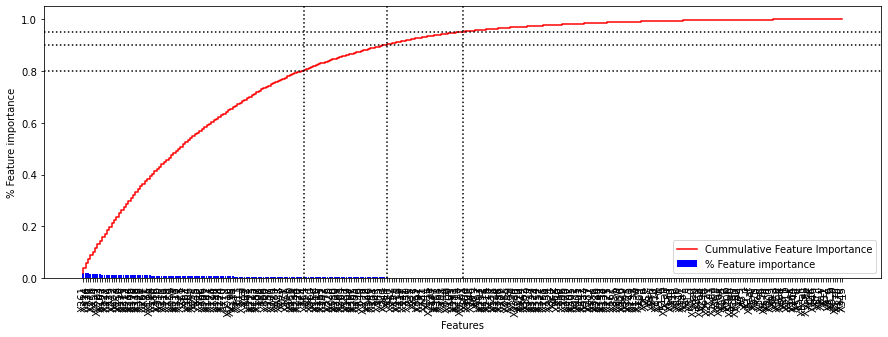

In [65]:
imp = imp.sort_values ('importance', ascending = False)
imp ['importance_perc'] = imp.importance / imp.importance.sum ()

plt.figure (figsize=(15, 5))
plt.bar (imp.features, imp.importance_perc, color = 'b', label = '% Feature importance')
plt.step (imp.features, imp.importance_perc.cumsum (), color = 'r', label = 'Cummulative Feature Importance')
plt.axhline (0.95, linestyle = 'dotted', color = 'k')
plt.axvline (np.where (imp.importance_perc.cumsum () > 0.95)[0][0], linestyle = 'dotted', color = 'k')
plt.axhline (0.9, linestyle = 'dotted', color = 'k')
plt.axvline (np.where (imp.importance_perc.cumsum () > 0.9)[0][0], linestyle = 'dotted', color = 'k')
plt.axhline (0.8, linestyle = 'dotted', color = 'k')
plt.axvline (np.where (imp.importance_perc.cumsum () > 0.8)[0][0], linestyle = 'dotted', color = 'k')
plt.xticks (rotation = 90)
plt.xlabel ('Features')
plt.ylabel ('% Feature importance')
plt.legend ()
plt.show ()

##### We will select top 90% features.

In [73]:
# creating cummulative % importance column
imp ['cum_importance'] = imp.importance_perc.cumsum ()

# selecting the columns to be dropped
dropcols = imp [imp.cum_importance > 0.90].features.values

# Dropping the selected columns
X.drop (columns = dropcols, inplace = True)
merc_test.drop (columns = dropcols, inplace = True)

c:\python\python38\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [74]:
print ('The shape of the train features =', X.shape)

The shape of the train features = (4208, 128)


In [77]:
# Saving the final train and the test data

merc_train_f = pd.concat ([X, y], axis = 1)
merc_test_f = merc_test.drop (columns = 'y')
merc_train_f.to_csv (r'H:\Documents\Study material\Data Science course\Machine Learning\Main projects\Project - Mercedes-Benz Greener Manufacturing\train_final.csv', 
                     index = False)
merc_test_f.to_csv (r'H:\Documents\Study material\Data Science course\Machine Learning\Main projects\Project - Mercedes-Benz Greener Manufacturing\test_final.csv', 
                     index = False)

In [ ]:
merc_train_f = pd.read_csv (r'H:\Documents\Study material\Data Science course\Machine Learning\Main projects\Project - Mercedes-Benz Greener Manufacturing\train_final.csv')
merc_test_f = pd.read_csv (r'H:\Documents\Study material\Data Science course\Machine Learning\Main projects\Project - Mercedes-Benz Greener Manufacturing\test_final.csv')

In [ ]:
# Separating the X and y variables

X = merc_train_f.drop (columns = 'y')
y = merc_train_f.y

In [79]:
# Performing train and test split on the train data

X_train, X_test, y_train, y_test = split (X, y, test_size = 0.3, random_state = 23)

In [80]:
# Building the xgboost model and checking the r2 score

xgbmodel = xgboost.XGBRegressor ()
xgbmodel.fit (X_train, y_train)
print ('The R2 score for train data =', xgbmodel.score (X_train, y_train))
print ('The R2 score for test data =', xgbmodel.score (X_test, y_test))

The R2 score for train data = 0.7796939592777037
The R2 score for test data = 0.5128684587130652


##### There is evidence of overfitting in the model. We must tune the hyper parameters.

In [98]:
# Tuning for n_estimators with all other parameters kept same

params = {'n_estimators': np.arange(25, 200, 25)}
model = GridSearchCV (estimator = xgbmodel, param_grid = params,
                      n_jobs = -1, cv = 5, scoring = 'r2')
model.fit (X, y)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=0,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
      

In [99]:
# Getting the best parameters

model.best_params_

{'n_estimators': 25}

##### We see that it is on the lower side. So, let's tune between 1 to 25.

In [100]:
params = {'n_estimators': np.arange(1, 26)}
model = GridSearchCV (estimator = xgbmodel, param_grid = params,
                      n_jobs = -1, cv = 5, scoring = 'r2')
model.fit (X, y)
print ('Best parameter =', model.best_params_)
print ('Best score =', model.best_score_)

Best parameter = {'n_estimators': 15}
Best score = 0.5832953606516282


##### The best n_estimators = 15.

In [101]:
# Selecting the best model

xgbmodel = model.best_estimator_

In [102]:
# Tuning for max_depth and min_child_weight

params = {'max_depth' : range(1,10), 'min_child_weight' : range(1,6)}
model = GridSearchCV (estimator = xgbmodel, param_grid = params,
                      n_jobs = -1, cv = 5, scoring = 'r2')
model.fit (X, y)

# Getting the best parameters and score

print ('Best parameter =', model.best_params_)
print ('Best score =', model.best_score_)

Best parameter = {'max_depth': 3, 'min_child_weight': 2}
Best score = 0.5931918444330585


In [103]:
# Selecting the best model

xgbmodel = model.best_estimator_

In [104]:
# Tuning for gamma parameter

params = {'gamma' : [i/10.0 for i in range(0,5)]}
model = GridSearchCV (estimator = xgbmodel, param_grid = params,
                      n_jobs = -1, cv = 5, scoring = 'r2')
model.fit (X, y)

# Getting the best parameters and score

print ('Best parameter =', model.best_params_)
print ('Best score =', model.best_score_)

Best parameter = {'gamma': 0.0}
Best score = 0.5931918444330585


In [105]:
# Selecting the best model

xgbmodel = model.best_estimator_

In [106]:
# Tuning for subsample and colsample

params = {'subsample' : np.linspace(0,1,40), 'colsample_bytree' : np.linspace(0,1,40)}
model = GridSearchCV (estimator = xgbmodel, param_grid = params,
                      n_jobs = -1, cv = 5, scoring = 'r2')
model.fit (X, y)

# Getting the best parameters and score

print ('Best parameter =', model.best_params_)
print ('Best score =', model.best_score_)

Best parameter = {'colsample_bytree': 0.8974358974358974, 'subsample': 1.0}
Best score = 0.5940707111403671


In [107]:
# Selecting the best model

xgbmodel = model.best_estimator_

In [110]:
# Tuning for regularization parameters

params = {'reg_alpha' : [1e-5, 1e-2, 0.1, 1, 100], 'reg_lambda' : [1e-5, 1e-2, 0.1, 1, 100]}
model = GridSearchCV (estimator = xgbmodel, param_grid = params,
                      n_jobs = -1, cv = 5, scoring = 'r2')
model.fit (X, y)

# Getting the best parameters and score

print ('Best parameter =', model.best_params_)
print ('Best score =', model.best_score_)

Best parameter = {'reg_alpha': 1, 'reg_lambda': 1}
Best score = 0.594213038613779


In [111]:
# Selecting the best model

xgbmodel = model.best_estimator_

In [113]:
# Tuning for learning rate and n_estimators

from sklearn.model_selection import RandomizedSearchCV

params = {'learning_rate':np.logspace(-4, 0, 20), 
         'n_estimators': np.arange(50, 1000, 50)}

model = RandomizedSearchCV (estimator = xgbmodel, param_distributions = params, 
                            n_iter = 30, n_jobs = -1, cv = 5, scoring = 'r2')
model.fit (X, y)

# Getting the best parameters and score

print ('Best parameter =', model.best_params_)
print ('Best score =', model.best_score_)

Best parameter = {'n_estimators': 900, 'learning_rate': 0.007847599703514606}
Best score = 0.592974040831281


##### We got the best result with previous setting. We will keep that as best estimator and proceed with the predictions on the test data.

In [114]:
# Training on the train data

xgbmodel.fit (X_train, y_train)

# Making predictions on the test data

ypred = model.predict (X_test)
print ('R2 score on the train data =', xgbmodel.score (X_train, y_train))
print ('R2 score on the test data =', r2_score (y_test, ypred))
print ('RMSE =', mse (y_test, ypred, squared = False))

R2 score on the train data = 0.6088275211896679
R2 score on the test data = 0.6201431384493552
RMSE = 7.418836394876462


In [117]:
# Training the model on the complete train data

xgbmodel.fit (X, y)

# Making prediction on the unseen test data

ypred = xgbmodel.predict (merc_test_f)

# importing the orginal test file

test = pd.read_csv (r'H:\Documents\Study material\Data Science course\Machine Learning\Main projects\Project - Mercedes-Benz Greener Manufacturing\test.csv')

# adding the predictions to unseen test data

test ['y'] = ypred

# Saving the test file with the predictions

test.to_csv (r'H:\Documents\Study material\Data Science course\Machine Learning\Main projects\Project - Mercedes-Benz Greener Manufacturing\test_pred.csv', 
             index = False)

##### Project completed by: Sahaj Harnal
##### Email: sahajharnal@gmail.com